<a href="https://colab.research.google.com/github/AluizioW/nivel_rio_prophet/blob/main/prohet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df = pd.read_csv('/content/comdec data (ajustes).csv', parse_dates=['data'], dtype={'nivel cm': 'float64'})

In [3]:
df.head()

,data,nivel cm
0,2005-01-01,313.0
1,2005-01-02,315.0
2,2005-01-03,317.0
3,2005-01-04,323.0
4,2005-01-05,325.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      6939 non-null   datetime64[ns]
 1   nivel cm  6939 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 108.6 KB


In [5]:
df_treino = df.copy()
df_treino = df_treino.set_index('data').sort_index()
df_treino.tail()


,nivel cm
data,
2023-12-27,184.0
2023-12-28,186.0
2023-12-29,187.0
2023-12-30,196.0
2023-12-31,199.0


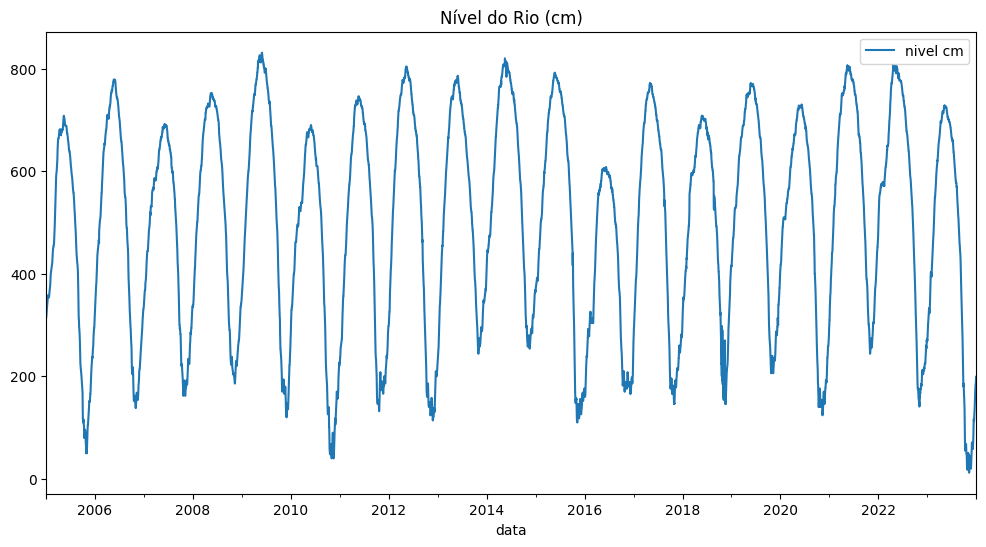

In [6]:
df_treino.plot(figsize=(12, 6), title='Nível do Rio (cm)')
plt.show()

In [7]:
df_treino = df_treino.reset_index().rename(columns={'data': 'ds', 'nivel cm': 'y'})
df_treino.head()


,ds,y
0,2005-01-01,313.0
1,2005-01-02,315.0
2,2005-01-03,317.0
3,2005-01-04,323.0
4,2005-01-05,325.0


In [8]:
model = Prophet()
model.fit(df_treino)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2tio_u6/1bwsw657.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2tio_u6/8700a7co.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78962', 'data', 'file=/tmp/tmpe2tio_u6/1bwsw657.json', 'init=/tmp/tmpe2tio_u6/8700a7co.json', 'output', 'file=/tmp/tmpe2tio_u6/prophet_modelkk_cdhut/prophet_model-20250210154739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
proximo_ano = model.make_future_dataframe(periods=365)
previsao = model.predict(proximo_ano)
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7299,2024-12-26,453.851964,171.930602,330.912556,410.755007,505.069735,-205.986519,-205.986519,-205.986519,0.064221,0.064221,0.064221,-206.050740,-206.050740,-206.050740,0.0,0.0,0.0,247.865446
7300,2024-12-27,453.795109,180.952357,336.622828,410.549031,505.178307,-201.270422,-201.270422,-201.270422,0.040030,0.040030,0.040030,-201.310452,-201.310452,-201.310452,0.0,0.0,0.0,252.524686
7301,2024-12-28,453.738253,174.328785,340.815986,410.343055,505.286879,-196.638031,-196.638031,-196.638031,-0.115051,-0.115051,-0.115051,-196.522980,-196.522980,-196.522980,0.0,0.0,0.0,257.100223
7302,2024-12-29,453.681398,180.404402,349.880441,410.137078,505.395451,-191.776795,-191.776795,-191.776795,-0.083539,-0.083539,-0.083539,-191.693256,-191.693256,-191.693256,0.0,0.0,0.0,261.904603
7303,2024-12-30,453.624542,187.350805,354.811165,409.931102,505.514537,-186.627063,-186.627063,-186.627063,0.199249,0.199249,0.199249,-186.826312,-186.826312,-186.826312,0.0,0.0,0.0,266.997479


In [10]:
previsao.to_csv('previsao.csv', index=False)

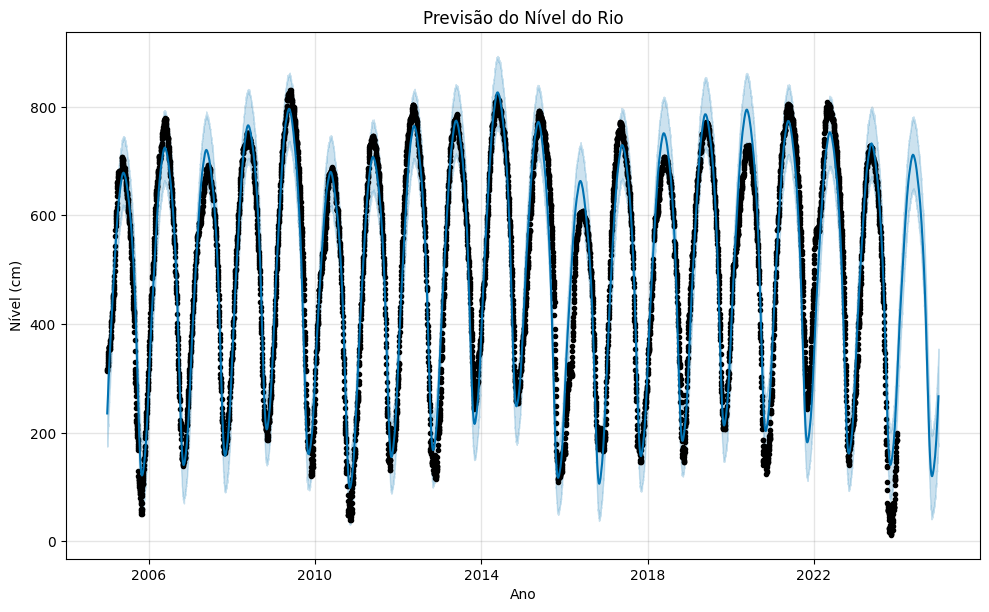

In [11]:
model.plot(previsao)
plt.title('Previsão do Nível do Rio')
plt.xlabel('Ano')
plt.ylabel('Nível (cm)')
plt.show()

In [12]:
previsao['ds']

,ds
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
7299,2024-12-26
7300,2024-12-27
7301,2024-12-28
7302,2024-12-29


In [13]:
previsao['yhat']

,yhat
0,235.367829
1,240.492518
2,245.884521
3,250.821555
4,255.808087
...,...
7299,247.865446
7300,252.524686
7301,257.100223
7302,261.904603


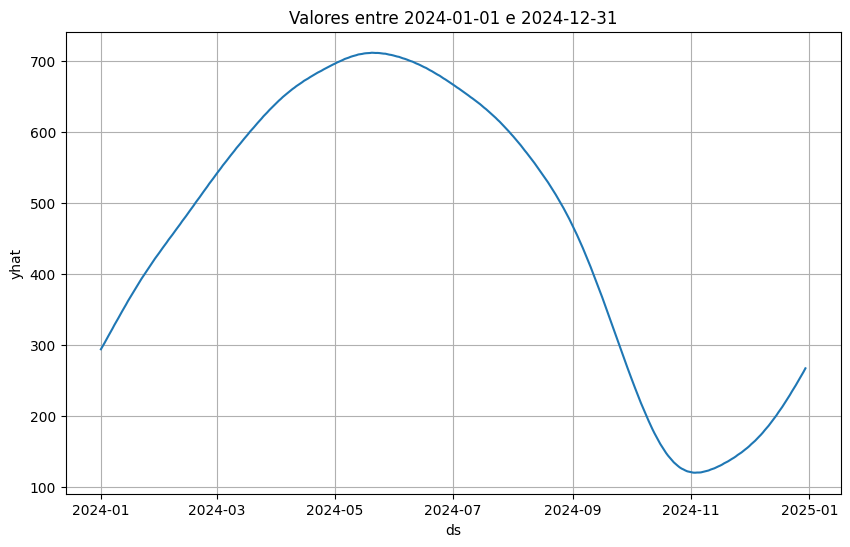

In [16]:
# Filtrar o período específico
inicio = '2024-01-01'
fim = '2024-12-31'

previsao_filtrado = previsao[(previsao['ds'] >= inicio) & (previsao['ds'] <= fim)]

# Plotar o gráfico com o período filtrado
plt.figure(figsize=(10, 6))
plt.plot(previsao_filtrado['ds'], previsao_filtrado['yhat'])

plt.title('Valores entre {} e {}'.format(inicio, fim))
plt.xlabel('ds')
plt.ylabel('yhat')
plt.grid(True)
plt.show()